In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

path = "/Users/amaros/Library/CloudStorage/OneDrive-UniversityofMarylandSchoolofMedicine/mgss2/python_to_R_files_construction/log_norm.pkl"

with open(path, 'rb') as file:
        log_norm = pickle.load(file)

mgcst_samples_df = pd.read_csv("../Data/mgCSTs.samples.df2.csv")

In [2]:
model = {}

for minclustersize in np.arange(10,51):
    model[minclustersize] = {}
    for deepsplit in np.arange(0,5) :

        print(minclustersize,deepsplit)
        model[minclustersize][deepsplit] = []
        mgcst_sample = mgcst_samples_df[(mgcst_samples_df['minClusterSize'] == minclustersize) & (mgcst_samples_df['deepSplit'] == deepsplit)]
        df = pd.merge(mgcst_sample, log_norm, on='sampleID', how='inner')
        sampleID = df['sampleID']
        mgCST = df['mgCST']
        df = df.drop(['dtc','mgCST','sampleID','minClusterSize','deepSplit','domTaxa', 'relabund'], axis = 1)

        pca = PCA(n_components=3)
        principal_components = pca.fit_transform(df)
        explained_variance = pca.explained_variance_
        explained_variance_ratio = pca.explained_variance_ratio_
        pca_model = {'principal_components' : principal_components,
                     'explained_var_' : explained_variance,
                     'explained_var_ratio' : explained_variance_ratio,
                     'sampleID' : sampleID,
                     'mgCST' : mgCST}
            
        model[minclustersize][deepsplit].append(pca_model)

with open('pca_model2.pkl', 'wb') as file:
    pickle.dump(model, file)

10 0
10 1
10 2
10 3
10 4
11 0
11 1
11 2
11 3
11 4
12 0
12 1
12 2
12 3
12 4
13 0
13 1
13 2
13 3
13 4
14 0
14 1
14 2
14 3
14 4
15 0
15 1
15 2
15 3
15 4
16 0
16 1
16 2
16 3
16 4
17 0
17 1
17 2
17 3
17 4
18 0
18 1
18 2
18 3
18 4
19 0
19 1
19 2
19 3
19 4
20 0
20 1
20 2
20 3
20 4
21 0
21 1
21 2
21 3
21 4
22 0
22 1
22 2
22 3
22 4
23 0
23 1
23 2
23 3
23 4
24 0
24 1
24 2
24 3
24 4
25 0
25 1
25 2
25 3
25 4
26 0
26 1
26 2
26 3
26 4
27 0
27 1
27 2
27 3
27 4
28 0
28 1
28 2
28 3
28 4
29 0
29 1
29 2
29 3
29 4
30 0
30 1
30 2
30 3
30 4
31 0
31 1
31 2
31 3
31 4
32 0
32 1
32 2
32 3
32 4
33 0
33 1
33 2
33 3
33 4
34 0
34 1
34 2
34 3
34 4
35 0
35 1
35 2
35 3
35 4
36 0
36 1
36 2
36 3
36 4
37 0
37 1
37 2
37 3
37 4
38 0
38 1
38 2
38 3
38 4
39 0
39 1
39 2
39 3
39 4
40 0
40 1
40 2
40 3
40 4
41 0
41 1
41 2
41 3
41 4
42 0
42 1
42 2
42 3
42 4
43 0
43 1
43 2
43 3
43 4
44 0
44 1
44 2
44 3
44 4
45 0
45 1
45 2
45 3
45 4
46 0
46 1
46 2
46 3
46 4
47 0
47 1
47 2
47 3
47 4
48 0
48 1
48 2
48 3
48 4
49 0
49 1
49 2
49 3
49 4


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

path = "../Data/pca_model2.pkl"

with open(path, 'rb') as file:
        model = pickle.load(file)

principal_components=model[10][4][0]['principal_components']
sampleID=model[10][4][0]['sampleID']
mgCST=model[10][4][0]['mgCST']
explained_variance = model[10][4][0]['explained_var_ratio']

projets = pd.read_csv("../Data/VIRGO2_projects.csv")
mgcst_color = pd.read_csv("../Data/mgCST_sort_color.csv")
mgcst_color = mgcst_color[(mgcst_color['minClusterSize'] == 10) & (mgcst_color['deepSplit'] == 4)]
# Assign mgCST color for each sample
color_mgCST = mgcst_color[['mgCST', 'color_mgCST']].reset_index(drop = True)
color_mgCST = color_mgCST[color_mgCST['mgCST'].isin(mgCST)]

principal_components = pd.DataFrame(data=principal_components, columns = ['PC1','PC2','PC3'])
pca_df = pd.concat([sampleID, principal_components,mgCST], axis=1)
pca_df = pd.merge(pca_df, projets, on='sampleID', how='inner') 
 
pca_df = pd.merge(pca_df, mgcst_color, on='mgCST', how='inner')      
pca_df = pca_df.sort_values(by='mgCST', ascending=True)

<Axes: xlabel='PC1', ylabel='PC2'>

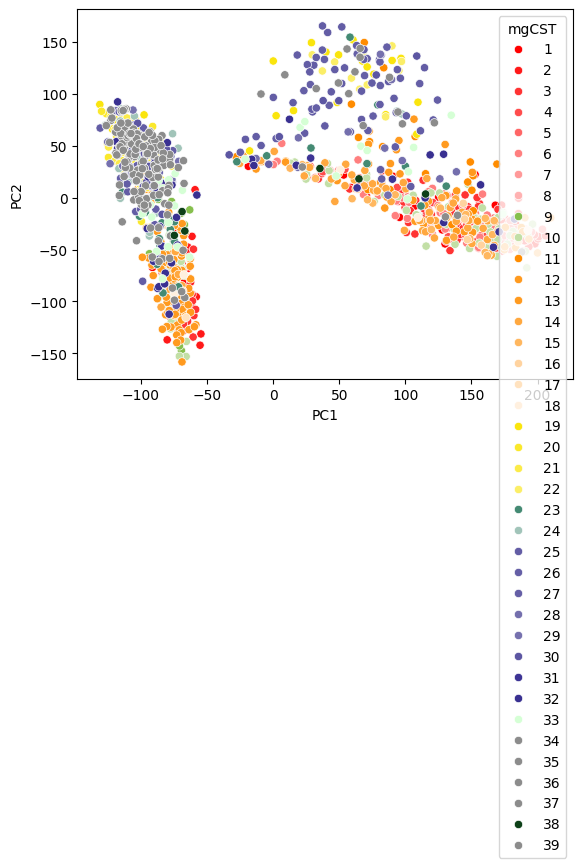

In [4]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='mgCST', palette=list(color_mgCST['color_mgCST'].values))

<Axes: xlabel='PC1', ylabel='PC2'>

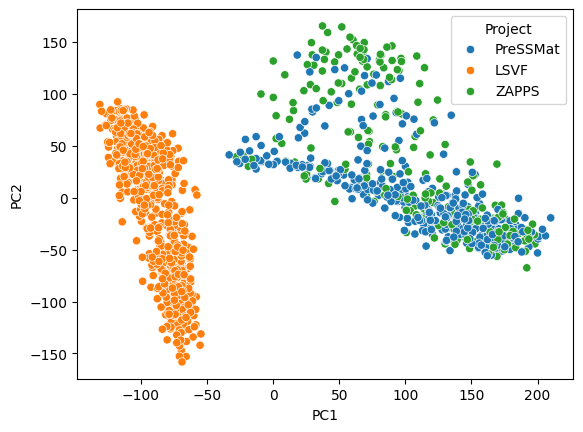

In [5]:
sns.scatterplot(data = pca_df, x='PC1', y='PC2', hue='Project')

In [6]:
import plotly.express as px

df = pca_df
df['mgCST'] = df['mgCST'].astype(str)

fig = px.scatter(df, x='PC1', y='PC2', color='mgCST',
                     color_discrete_sequence=color_mgCST['color_mgCST'].values, title="PCA visualization - all samples",
                     labels = {'PC1' : "PC1 : "+str(round(explained_variance[0]*100,2))+"%",
                               'PC2' : "PC2 : "+str(round(explained_variance[1]*100,2)) + "%"})
fig.show()

In [120]:
fig = px.scatter(df, x='PC1', y='PC2', color='Project')
fig.show()